## DATA ANALYTICS – IBM PROJECT

Why do workers resign from the positions they hold? Can employee attrition be anticipated? Can companies take steps to prevent high employee turn-over?

Employee attrition is the reduction of staff by voluntary or involuntary reasons. These can be through natural means like retirement, or it can be through resignation, termination of contract, or when a company decides to make a position redundant. Excessive involuntary attrition can be detrimental to the overall business goals, and can lead to understaffing, increased job burden on remaining employees, and harmful consequences to company reputation. 

You’ve just been hired by IBM to work in their Data Analytics sector. On your second day, you are given a dataset from HR that includes several records of employees that were with the company in the prior calendar year. Since the development of the dataset, some of those employees have since resigned from their positions. The company was surprised with the recent level of turnover and have tasked you with digging into the data to determine any insights about what leads to employee turnover, and alternatively, what aspects of the jobs can be protected to reduce employee turnover. 

Using the ‘IBM Employee Attrition’ dataset – your role is to comprehensively explore the data and generate meaningful insights into what the data is presenting. 

You should conclude your assignment with 3 recommendations you will make to the HR department regarding employee attrition. 

At the least, you should complete the following tasks:
    
    •Data prep and cleaning – prior to exploring the data, you should ensure that the dataset is clean, all variables are in their proper format, and the data is free of missing, abnormal, or outlier values. 
    
    •Exploratory data analysis – you should explore every aspect of the data to determine the features of the data, the range of values for all variables of interest, and the relationships between variables. Exploration should be conducted outside of predictive modeling – in other words, you are not only interested in how the dependent and independent variables interact – you should also spend some time exploring variations in the data among variables (i.e. how does salary differ between genders? Does time spent in the company differ by job role?)
    
    •Modeling – after thoroughly exploring the data, create a logistic regression model that predicts employee attrition based on the other variables available to you. Clearly interpret your model findings. Re-run/tweak your model if you think you can find a better fit. 
    
    •Visualization – Create at least 3 visualizations that highlight some of the most interesting findings in your dataset. These can be findings from the regression model or any interesting relationships between variables. 

Good luck!


In [1]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm
import scipy.stats as stats

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

###
df = pd.read_excel("IBM Employee Attrition.xlsx")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [3]:
df.drop("EmployeeNumber", axis = 1, inplace = True)  ## same as index - 1, redundant
df.shape

(1470, 29)

In [4]:
df["Over18"].value_counts()  ## looks like everyone is over 18, remove redundant column

Y    1470
Name: Over18, dtype: int64

In [5]:
df.drop("Over18", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [6]:
## convert attrition column to integer 0 or 1

df["Attrition"] = np.where(df["Attrition"] == "Yes", 1, 0)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [7]:
df["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [8]:
## assign numerical value to business travel, no travel = 0, travel rarely = 1, tarvel frequently = 2

df.loc[df["BusinessTravel"] == "Non-Travel", "BusinessTravel"] = 0
df.loc[df["BusinessTravel"] == "Travel_Rarely", "BusinessTravel"] = 1
df.loc[df["BusinessTravel"] == "Travel_Frequently", "BusinessTravel"] = 2
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [9]:
## 30 columns and 1470 employees' data

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [11]:
df.loc[df.duplicated()]  ## no duplicates

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [12]:
## function to calculate z_scores. Accepts 2 arguments, the dataframe and the column x for z-score
## returns the out_liers index

def Cal_zscore(df_temp, x):
    y = "zscore_" + x
    df_temp[y] = np.abs(stats.zscore(df_temp[x]))

In [13]:
dfz = df.copy()  ## copy dataframe to calculate outliers by zscore

In [14]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [15]:
## get each column, check if column has only numbers
## call Cal_zscore function to create columns zscore

for i in dfz:
    if np.issubdtype(dfz[i].dtype, np.number):
        Cal_zscore(dfz, i)

In [16]:
dfz.info() ## 1470 employees with all outliers still present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1470 non-null   int64  
 1   Attrition                        1470 non-null   int32  
 2   BusinessTravel                   1470 non-null   object 
 3   Department                       1470 non-null   object 
 4   DistanceFromHome                 1470 non-null   int64  
 5   Education                        1470 non-null   int64  
 6   EducationField                   1470 non-null   object 
 7   EnvironmentSatisfaction          1470 non-null   int64  
 8   Gender                           1470 non-null   object 
 9   JobInvolvement                   1470 non-null   int64  
 10  JobLevel                         1470 non-null   int64  
 11  JobRole                          1470 non-null   object 
 12  JobSatisfaction     

In [17]:
## Loop thru the zscore columns and remove all the outliers

i = 28  ## first z_score column zscore_Age

## while not at end of last column. Get all rows index where zscore is greater than 3 and remove that row

while i <= 48:
    z_outliers = dfz.loc[dfz.iloc[:,i] > 3].index
    i += 1
    print(z_outliers)
    dfz.drop(z_outliers, inplace = True)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([  85,   98,  126,  187,  270,  401,  445,  595,  624,  894,  956,
            1043, 1116, 1184, 1301, 1401],
           dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([  62,  190,  237,  411,  425,  473,  477,  561,  592,  653,  677,
             749,  861,  914,  918,  962, 1086, 1111, 1135, 1138],
           dtype='int64')
Int64Index([63, 123, 231, 281, 466, 716, 746, 976, 1024, 1327, 1351, 1430], dtype='int64')
Int64Index([  45,   64,  110,  178,  218,  326,  386,  427,  535,  584,  701,
             752,  799,  838,  87

In [18]:
dfz.shape  ## now 1387 employees where 83 employees were outliers

(1387, 49)

In [19]:
dfz.reset_index(drop=True, inplace = True)

In [20]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1387 non-null   int64  
 1   Attrition                        1387 non-null   int32  
 2   BusinessTravel                   1387 non-null   object 
 3   Department                       1387 non-null   object 
 4   DistanceFromHome                 1387 non-null   int64  
 5   Education                        1387 non-null   int64  
 6   EducationField                   1387 non-null   object 
 7   EnvironmentSatisfaction          1387 non-null   int64  
 8   Gender                           1387 non-null   object 
 9   JobInvolvement                   1387 non-null   int64  
 10  JobLevel                         1387 non-null   int64  
 11  JobRole                          1387 non-null   object 
 12  JobSatisfaction     

In [21]:
pd.crosstab(dfz["Attrition"], df["Gender"])

Gender,Female,Male
Attrition,,
0,455,703
1,104,125


In [22]:
dfz["MonthlyIncome"].groupby(df["Gender"]).mean()

Gender
Female    6086.277281
Male      5985.158213
Name: MonthlyIncome, dtype: float64

In [23]:
## Females earn on average more than males at IBM. Females worked longer at IBM than males

In [24]:
dfz["EnvironmentSatisfaction"].groupby(df["Gender"]).mean()

Gender
Female    2.661896
Male      2.768116
Name: EnvironmentSatisfaction, dtype: float64

In [25]:
dfz["JobSatisfaction"].groupby(df["Gender"]).mean()

Gender
Female    2.776386
Male      2.717391
Name: JobSatisfaction, dtype: float64

In [26]:
dfz["PercentSalaryHike"].groupby(df["Gender"]).mean()

Gender
Female    15.248658
Male      15.188406
Name: PercentSalaryHike, dtype: float64

In [27]:
dfz["YearsAtCompany"].groupby(df["Gender"]).mean()

Gender
Female    6.105546
Male      6.103865
Name: YearsAtCompany, dtype: float64

In [28]:
dfz["YearsSinceLastPromotion"].groupby(df["Gender"]).mean()

Gender
Female    1.719141
Male      1.814010
Name: YearsSinceLastPromotion, dtype: float64

In [29]:
dfz["Age"].groupby(dfz["Attrition"]).mean()  ## those that leave are younger

Attrition
0    36.884283
1    33.091703
Name: Age, dtype: float64

In [30]:
dfz["EnvironmentSatisfaction"].groupby(dfz["Attrition"]).mean()

Attrition
0    2.779793
1    2.449782
Name: EnvironmentSatisfaction, dtype: float64

In [31]:
## Environment statisfaction is lower among those with attrition positive

In [32]:
dfz["BusinessTravel"].groupby(dfz["Attrition"]).mean()  ## those that travel more tend to leave

Attrition
0    1.056131
1    1.240175
Name: BusinessTravel, dtype: float64

In [33]:
dfz["DistanceFromHome"].groupby(dfz["Attrition"]).mean()  ## those that live farther away attrition positive

Attrition
0     8.882556
1    10.663755
Name: DistanceFromHome, dtype: float64

In [34]:
dfz["JobLevel"].groupby(dfz["Attrition"]).mean()

Attrition
0    2.033679
1    1.563319
Name: JobLevel, dtype: float64

In [35]:
## Those that are leaving are at lower job level

In [36]:
dfz["JobSatisfaction"].groupby(dfz["Attrition"]).mean()

Attrition
0    2.797064
1    2.458515
Name: JobSatisfaction, dtype: float64

In [37]:
dfz["MonthlyIncome"].groupby(dfz["Attrition"]).mean() 

Attrition
0    6331.565630
1    4480.292576
Name: MonthlyIncome, dtype: float64

In [38]:
## Those that stayed have higher income

In [39]:
dfz["NumCompaniesWorked"].groupby(dfz["Attrition"]).mean()

Attrition
0    2.626079
1    2.965066
Name: NumCompaniesWorked, dtype: float64

In [40]:
dfz["PerformanceRating"].groupby(dfz["Attrition"]).mean()

Attrition
0    3.151123
1    3.161572
Name: PerformanceRating, dtype: float64

In [41]:
dfz["YearsSinceLastPromotion"].groupby(dfz["Attrition"]).mean()

Attrition
0    1.808290
1    1.611354
Name: YearsSinceLastPromotion, dtype: float64

In [42]:
dfz["YearsWithCurrManager"].groupby(dfz["Attrition"]).mean()

Attrition
0    4.035406
1    2.611354
Name: YearsWithCurrManager, dtype: float64

In [43]:
dfz["PerformanceRating"].groupby(dfz["Attrition"]).mean()

Attrition
0    3.151123
1    3.161572
Name: PerformanceRating, dtype: float64

In [44]:
dfz["PerformanceRating"].groupby(dfz["Attrition"]).mean()

Attrition
0    3.151123
1    3.161572
Name: PerformanceRating, dtype: float64

In [45]:
dfz["YearsAtCompany"].groupby(df["JobRole"]).mean()

JobRole
Healthcare Representative    6.190083
Human Resources              7.204082
Laboratory Technician        6.293878
Manager                      6.727273
Manufacturing Director       6.347826
Research Director            5.539474
Research Scientist           6.115523
Sales Executive              5.584967
Sales Representative         6.013158
Name: YearsAtCompany, dtype: float64

In [46]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1387 non-null   int64  
 1   Attrition                        1387 non-null   int32  
 2   BusinessTravel                   1387 non-null   object 
 3   Department                       1387 non-null   object 
 4   DistanceFromHome                 1387 non-null   int64  
 5   Education                        1387 non-null   int64  
 6   EducationField                   1387 non-null   object 
 7   EnvironmentSatisfaction          1387 non-null   int64  
 8   Gender                           1387 non-null   object 
 9   JobInvolvement                   1387 non-null   int64  
 10  JobLevel                         1387 non-null   int64  
 11  JobRole                          1387 non-null   object 
 12  JobSatisfaction     

In [47]:
dfz["JobInvolvement"].groupby(dfz["Attrition"]).mean()

Attrition
0    2.775475
1    2.519651
Name: JobInvolvement, dtype: float64

In [48]:
dfz_corr = dfz.copy()  ## correlation dataframe

dfz_corr.drop(dfz_corr.columns[28:49], axis = 1, inplace = True)   ## drop all zscore columns
dfz_corr.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [49]:
dfz_corr.corr()['Attrition']  ## get correlation to attrition only

Age                        -0.159366
Attrition                   1.000000
DistanceFromHome            0.081788
Education                  -0.032703
EnvironmentSatisfaction    -0.112393
JobInvolvement             -0.133957
JobLevel                   -0.171968
JobSatisfaction            -0.114206
MonthlyIncome              -0.161848
NumCompaniesWorked          0.050314
PercentSalaryHike          -0.006267
PerformanceRating           0.010781
RelationshipSatisfaction   -0.052344
StockOptionLevel           -0.136676
TotalWorkingYears          -0.185619
TrainingTimesLastYear      -0.057285
WorkLifeBalance            -0.062492
YearsAtCompany             -0.166455
YearsInCurrentRole         -0.171015
YearsSinceLastPromotion    -0.029263
YearsWithCurrManager       -0.162297
Name: Attrition, dtype: float64

In [50]:
## looks like nothing is even weakly correlated with attrition

0    1233
1     237
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

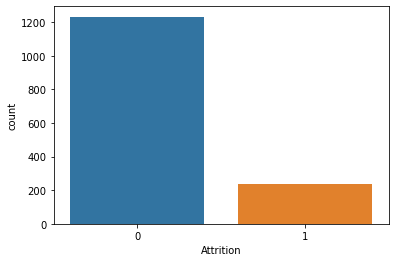

In [51]:
# check the coding of the dependent variable
## the value coded as "1" is Attrition "Yes"

###

print(df["Attrition"].value_counts())

###

sns.countplot(data = df, x = "Attrition")

In [52]:
## create the regression model
dfz_result = sm.ols('Attrition ~ Age + BusinessTravel + EnvironmentSatisfaction + MonthlyIncome + \
                    JobSatisfaction + YearsAtCompany + C(Gender) + C(Department)', data = dfz).fit()

## print the regression model summary
dfz_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     15.19
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           5.09e-26
Time:                        17:15:09   Log-Likelihood:                -521.20
No. Observations:                1387   AIC:                             1064.
Df Residuals:                    1376   BIC:                             1122.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.5527      0.077      7.216      0.000       0.402       0.703
BusinessTravel[T.1]                         0.0682      0.032      2.151      0.032       0.006       0.130
BusinessTravel[T.2]                         0.1721      0.037      4.674      0.000       0.100       0.244
C(Gender)[T.Male]                           0.0256      0.019      1.313      0.189      -0.013       0.064
C(Department)[T.Research & Development]    -0.0616      0.048     -1.286      0.199      -0.156       0.032
C(Department)[T.Sales]                      0.0158      0.050      0.319      0.750      -0.082       0.113
Age                                        -0.0040      0.001     -3.335      0.001      -0.006      -0.002
EnvironmentSatisfaction                    -0.0364      0.009     -4.173      0.000      -0.053      -0.019
MonthlyIncome                           -6.443e-06   2.67e-06     -2.412      0.016   -1.17e-05    -1.2e-06
JobSatisfaction                            -0.0385      0.009     -4.455      0.000      -0.056      -0.022
YearsAtCompany                             -0.0097      0.002     -4.393      0.000      -0.014      -0.005
==============================================================================
Omnibus:                      333.986   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.052
Skew:                           1.548   Prob(JB):                    1.24e-133
Kurtosis:                       4.001   Cond. No.                     7.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
## create the another regression model with original data with all outliers present
df_result = sm.ols('Attrition ~ Age + BusinessTravel + EnvironmentSatisfaction + MonthlyIncome + \
                    JobSatisfaction + YearsAtCompany + C(Gender) + C(Department)', data = df).fit()

## print the regression model summary
df_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     13.30
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           1.45e-22
Time:                        17:15:09   Log-Likelihood:                -551.17
No. Observations:                1470   AIC:                             1124.
Df Residuals:                    1459   BIC:                             1183.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.4874      0.074      6.592      0.000       0.342       0.632
BusinessTravel[T.1]                         0.0719      0.031      2.325      0.020       0.011       0.133
BusinessTravel[T.2]                         0.1698      0.036      4.732      0.000       0.099       0.240
C(Gender)[T.Male]                           0.0243      0.019      1.284      0.199      -0.013       0.061
C(Department)[T.Research & Development]    -0.0515      0.046     -1.119      0.263      -0.142       0.039
C(Department)[T.Sales]                      0.0206      0.048      0.432      0.666      -0.073       0.114
Age                                        -0.0037      0.001     -3.135      0.002      -0.006      -0.001
EnvironmentSatisfaction                    -0.0335      0.008     -3.971      0.000      -0.050      -0.017
MonthlyIncome                           -6.629e-06   2.52e-06     -2.631      0.009   -1.16e-05   -1.69e-06
JobSatisfaction                            -0.0363      0.008     -4.331      0.000      -0.053      -0.020
YearsAtCompany                             -0.0039      0.002     -2.233      0.026      -0.007      -0.000
==============================================================================
Omnibus:                      384.488   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              742.435
Skew:                           1.632   Prob(JB):                    6.06e-162
Kurtosis:                       4.213   Cond. No.                     7.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
## not much difference from removing outliers

In [55]:
## create another regression model
dfz_result = sm.ols('Attrition ~ Age + BusinessTravel + MonthlyIncome + YearsAtCompany', data = dfz).fit()

## print the regression model summary
dfz_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     19.19
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           1.68e-18
Time:                        17:15:09   Log-Likelihood:                -547.22
No. Observations:                1387   AIC:                             1106.
Df Residuals:                    1381   BIC:                             1138.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.3405      0.050      6.753      0.000       0.242       0.439
BusinessTravel[T.1]     0.0700      0.032      2.172      0.030       0.007       0.133
BusinessTravel[T.2]     0.1708      0.037      4.570      0.000       0.098       0.244
Age                    -0.0045      0.001     -3.679      0.000      -0.007      -0.002
MonthlyIncome       -5.613e-06    2.7e-06     -2.076      0.038   -1.09e-05   -3.08e-07
YearsAtCompany         -0.0100      0.002     -4.450      0.000      -0.014      -0.006
==============================================================================
Omnibus:                      364.338   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.845
Skew:                           1.649   Prob(JB):                    2.39e-153
Kurtosis:                       4.136   Cond. No.                     4.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Attrition
0    6331.565630
1    4480.292576
Name: MonthlyIncome, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

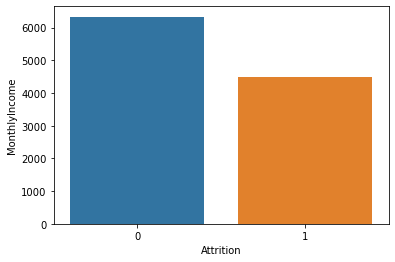

In [56]:
print(dfz["MonthlyIncome"].groupby(dfz["Attrition"]).mean())

###

sns.barplot(data = dfz, x = "Attrition", y = "MonthlyIncome", ci = None)

In [57]:
## Even though it looks like there is large difference in monthly income from those that stayed and left
## Increasing salary only decreased the attrition were limitedly. The coefficient is very small -0.000005613.
## 

Attrition
0    1.056131
1    1.240175
Name: BusinessTravel, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='BusinessTravel'>

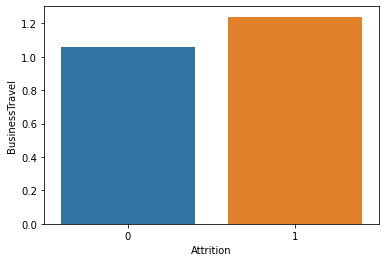

In [58]:
print(dfz["BusinessTravel"].groupby(dfz["Attrition"]).mean())

###

sns.barplot(data = dfz, x = "Attrition", y = "BusinessTravel", ci = None)

In [59]:
## creating the model

mod1 = sm.logit('Attrition ~ Age + BusinessTravel + EnvironmentSatisfaction + MonthlyIncome + \
                    JobSatisfaction + YearsAtCompany', data=dfz).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.398049
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1387
Model:                          Logit   Df Residuals:                     1379
Method:                           MLE   Df Model:                            7
Date:                Thu, 14 Apr 2022   Pseudo R-squ.:                  0.1116
Time:                        17:15:09   Log-Likelihood:                -552.09
converged:                       True   LL-Null:                       -621.43
Covariance Type:            nonrobust   LLR p-value:                 9.647e-27
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.1836      0.510      2.319      0.020       0.183       2.184
BusinessTravel[T.1]         0.6876      0.323      2.126      0.034       0.054       1.322
BusinessTravel[T.2]         1.4328      0.345      4.153      0.000       0.757       2.109
Age                        -0.0323      0.010     -3.243      0.001      -0.052      -0.013
EnvironmentSatisfaction    -0.2947      0.069     -4.266      0.000      -0.430      -0.159
MonthlyIncome           -8.041e-05   2.79e-05     -2.881      0.004      -0.000   -2.57e-05
JobSatisfaction            -0.2975      0.069     -4.327      0.000      -0.432      -0.163
YearsAtCompany             -0.0953      0.022     -4.261      0.000      -0.139      -0.051
===========================================================================================
"""

In [60]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

dfz_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

dfz_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

dfz_odds["Sig"] = np.where(dfz_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

dfz_odds

,OR,pvalue,Sig
Intercept,3.266092,0.020383,Sig
BusinessTravel[T.1],1.988945,0.033505,Sig
BusinessTravel[T.2],4.190228,0.000033,Sig
Age,0.968197,0.001183,Sig
EnvironmentSatisfaction,0.744751,0.000020,Sig
MonthlyIncome,0.999920,0.003968,Sig
JobSatisfaction,0.742697,0.000015,Sig
YearsAtCompany,0.909059,0.000020,Sig


In [61]:
## percent change = OR minus 1 multiplied by 100

dfz_odds["Pct Change"] = (dfz_odds["OR"] - 1) * 100

dfz_odds

,OR,pvalue,Sig,Pct Change
Intercept,3.266092,0.020383,Sig,226.609239
BusinessTravel[T.1],1.988945,0.033505,Sig,98.894514
BusinessTravel[T.2],4.190228,0.000033,Sig,319.022767
Age,0.968197,0.001183,Sig,-3.180287
EnvironmentSatisfaction,0.744751,0.000020,Sig,-25.524876
MonthlyIncome,0.999920,0.003968,Sig,-0.008041
JobSatisfaction,0.742697,0.000015,Sig,-25.730286
YearsAtCompany,0.909059,0.000020,Sig,-9.094065


In [62]:
mod1.predict({
    'BusinessTravel': 0, 
    'Age': 55, 
    'EnvironmentSatisfaction': 2, 
    'MonthlyIncome': 3000, 
    'JobSatisfaction': 1, 
    'YearsAtCompany': 10})

## if probability is greater than 50% > we classify this individual as having the outcome

0    0.064432
dtype: float64

In [63]:
mod1.predict({
    'BusinessTravel': 2, 
    'Age': 40, 
    'EnvironmentSatisfaction': 2, 
    'MonthlyIncome': 3000, 
    'JobSatisfaction': 1, 
    'YearsAtCompany': 10})

## if probability is greater than 50% > we classify this individual as having the outcome

0    0.319081
dtype: float64

In [64]:
## Look like business travel has the greatest effect on attrition. Keep all things equal and increasing bussiness
## travel frequency will likely make the person leave the company

In [65]:
## Overall there the data was not even weakly correlated with attrition.
## No single data point had correlation greater > 0.30 to attrition

## Frequent business travel seems to have the one that had the highest degree of effect on attrition
## Its statistical significnat wiht p < 0.05 and increased the attrition with increasing travel, coeff 0.1708

## Gender, department were not statistical significant in affecting attrition

## Increased age, environment satisfaction, job satisfication and years at company decreased attrition
## They were statistical significant with p < 0.05

In [66]:
## Overall employees would benefit and company can improve attrition if decreasing how often employees travel
## Incereasing employee salary does will not improve attrition
## 

In [67]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1387 non-null   int64  
 1   Attrition                        1387 non-null   int32  
 2   BusinessTravel                   1387 non-null   object 
 3   Department                       1387 non-null   object 
 4   DistanceFromHome                 1387 non-null   int64  
 5   Education                        1387 non-null   int64  
 6   EducationField                   1387 non-null   object 
 7   EnvironmentSatisfaction          1387 non-null   int64  
 8   Gender                           1387 non-null   object 
 9   JobInvolvement                   1387 non-null   int64  
 10  JobLevel                         1387 non-null   int64  
 11  JobRole                          1387 non-null   object 
 12  JobSatisfaction     

<AxesSubplot:xlabel='Age', ylabel='Density'>

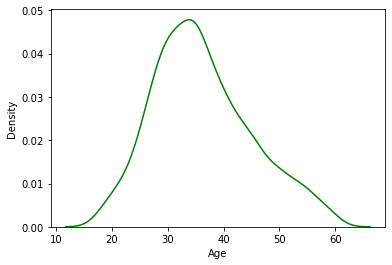

In [68]:
### simple density plot to show the distribution of age at company

sns.kdeplot(dfz['Age'], shade = False, color = "green")

<AxesSubplot:xlabel='MonthlyIncome'>

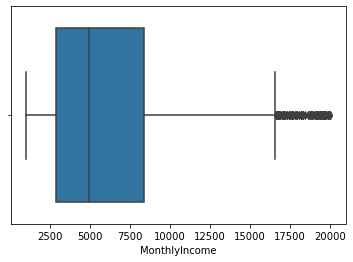

In [69]:
### creating a boxplot to show the distribution of monthly income

sns.boxplot(x = df["MonthlyIncome"])

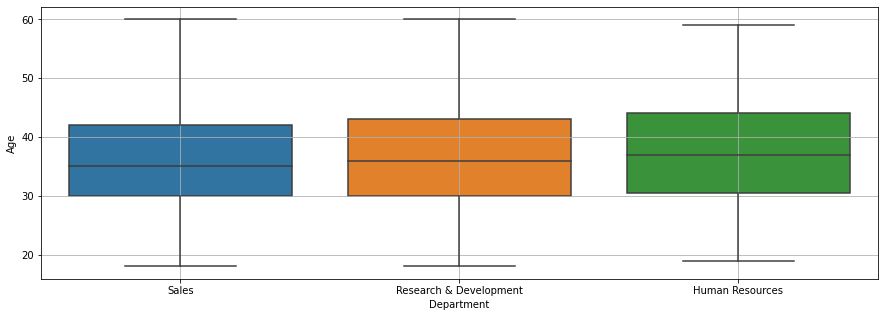

In [70]:
### creating a series of boxplots to show the distribution of attack across groups

plt.figure(figsize=(15,5)) # adjust the size of the output plot

sns.boxplot(x = df["Department"], y = df["Age"])

plt.grid() # add grid lines to plot

Text(0.5, 1.0, 'Average Monthly Income of Job Role')

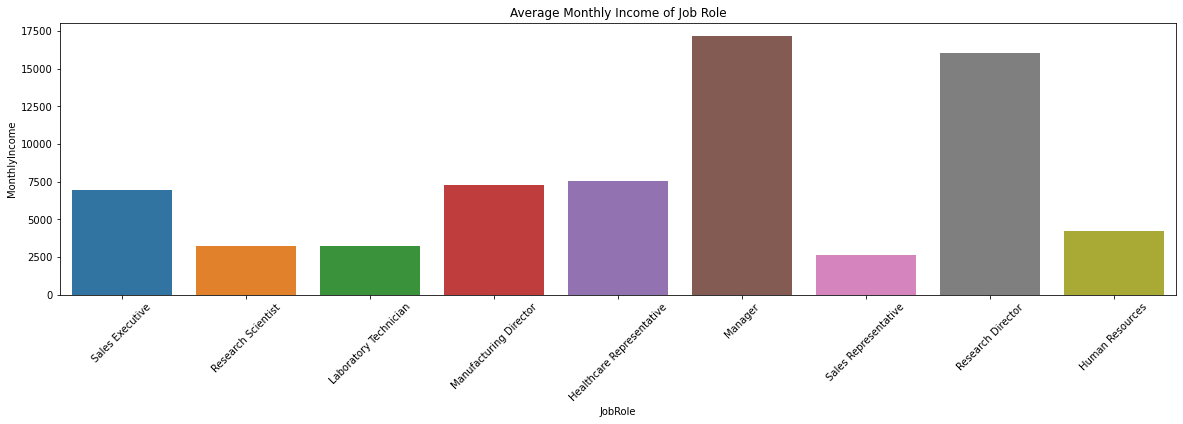

In [71]:
### create a barplot to show average monthly income across job role

plt.figure(figsize=(20,5))

sns.barplot(data = df, x = "JobRole", y = "MonthlyIncome", ci = None)

plt.xticks(rotation = 45)
plt.title('Average Monthly Income of Job Role')

Text(0.5, 1.0, 'Average Monthly Income by Education')

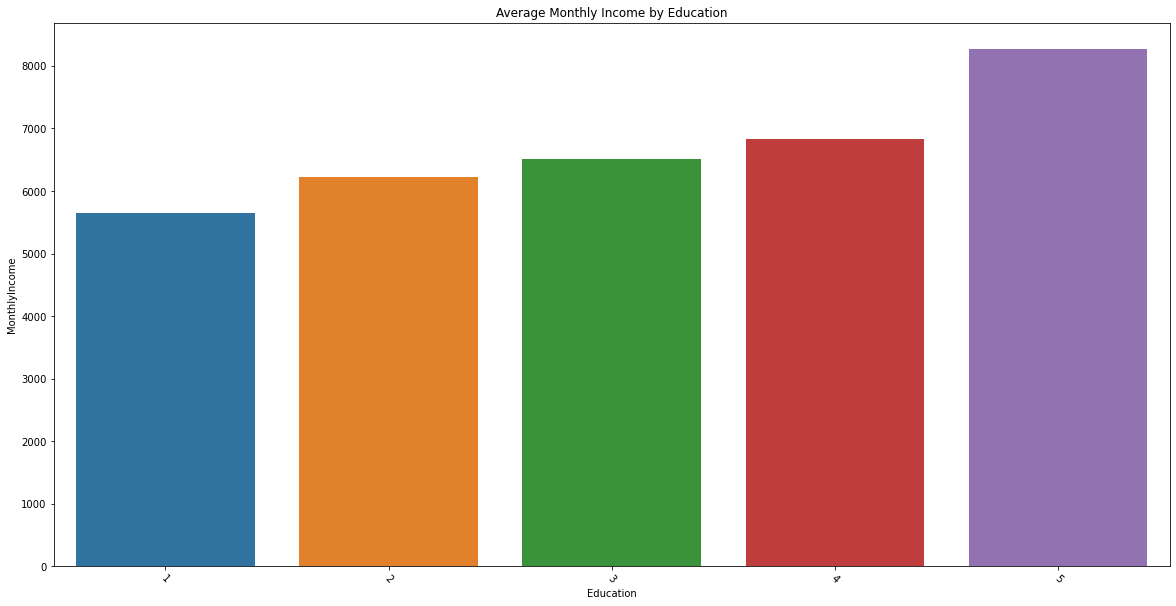

In [72]:
### create a barplot showing the average monthly income by education 

plt.figure(figsize=(20,10))

sns.barplot(data = df, x = "Education", y = "MonthlyIncome", ci = None)

plt.xticks(rotation = -45)
plt.title('Average Monthly Income by Education')